# Performance Metrics for Classification Models

## 1. Confusion Matrix
🔹 Definition:

A confusion matrix is a 2×2 table that summarizes the performance of a classification model by comparing actual vs predicted values.

|                     | **Predicted Positive**  | **Predicted Negative**  |
| ------------------- | ----------------------- | ----------------------- |
| **Actual Positive** | **True Positive (TP)**  | **False Negative (FN)** |
| **Actual Negative** | **False Positive (FP)** | **True Negative (TN)**  |

🔹 Meaning:

- TP → Correctly predicted positive cases

- TN → Correctly predicted negative cases

- FP → Incorrectly predicted positive (false alarm)

- FN → Missed actual positive (failure to detect)


## 2. Accuracy
🔹 Definition:

The ratio of correct predictions to total predictions.

 `Accuracy = TP + TN / TP + TN + FP + FN`
 
 Accuracy = Number of Correct Predictions / Total Sum of Predictions​.

🔹 Interpretation:

“How often is the model correct?”

🔹 When to Use:

- When the dataset is balanced (equal number of positive and negative samples).

⚠️ Warning: In imbalanced datasets, accuracy can be misleading
(e.g., predicting all zeros in a 95% zero dataset still gives 95% accuracy).



## 3. Precision (Positive Predictive Value)

🔹 Definition:

The proportion of predicted positives that are actually positive.

`Precision = TP/ TP + FP​`

🔹 Interpretation:

“When the model predicts positive, how often is it correct?”

🔹 When to Use:

- When false positives are costly.
e.g., Email Spam Filter → Marking a real email as spam is bad.

## 4. Recall (Sensitivity or True Positive Rate)
🔹 Definition:

The proportion of actual positives that were correctly identified.

`Recall = TP / TP + FN​`
	​

🔹 Interpretation:

“How many actual positives did the model correctly detect?”

🔹 When to Use:

- When false negatives are costly.
e.g., Disease Detection → Missing a patient with disease is dangerous.

## 5. F1-Score

🔹 Definition:

The harmonic mean of precision and recall — gives a single score that balances both.

`F1 Score = 2 × ( Precision x Recall ) / ( Precision + Recall )​`

🔹 Interpretation:

- High F1 = both precision and recall are reasonably high.

- Balances between false positives and false negatives.

🔹 When to Use:

- When classes are imbalanced

- When you need a single metric combining precision & recall.

## 6. ROC Curve (Receiver Operating Characteristic Curve)
🔹 Definition:

A graph that shows the trade-off between True Positive Rate (Recall) and False Positive Rate across different thresholds.

`FPR = FP / FP + TN`​

🔹 Interpretation:

- Each point represents a classification threshold (0–1)

- The closer the curve to the top-left corner, the better the model

## 7. AUC (Area Under the Curve)
🔹 Definition:

Measures the area under the ROC curve.
It represents how well the model distinguishes between classes.

0.5=No discrimination (random guess)

1.0=Perfect discrimination

🔹 Interpretation:

- Higher AUC → better model at ranking positive instances higher than negative ones.

🔹 When to Use:

- When comparing models on probabilistic classification performance

### 1️⃣ Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

### 2️⃣ Create a sample dataset

In [1]:
# Using sklearn's built-in dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
X = data.data
y = data.target

In [5]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3️⃣ Train a Logistic Regression model


In [6]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [7]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

### 4️⃣ Basic Performance Metrics

In [8]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

✅ Accuracy: 0.956140350877193
✅ Precision: 0.9459459459459459
✅ Recall: 0.9859154929577465
✅ F1 Score: 0.9655172413793104
✅ ROC-AUC Score: 0.9977071732721913


### 5️⃣ Confusion Matrix

f:\clg\Data Science\1-Python\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


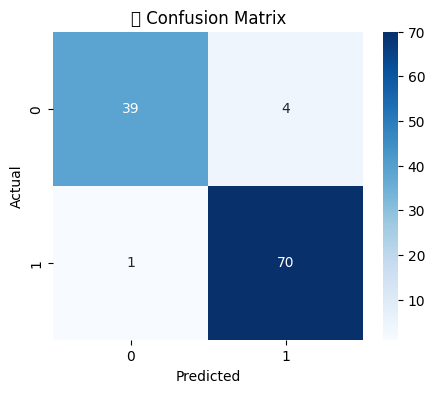

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 6️⃣ Detailed Classification Report

In [10]:
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


📋 Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 7️⃣ ROC Curve

f:\clg\Data Science\1-Python\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


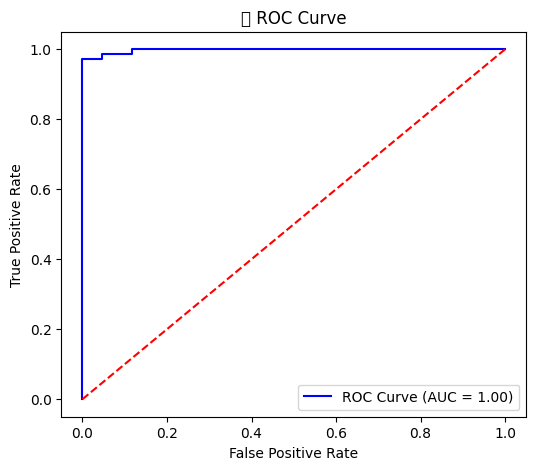

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🧭 ROC Curve')
plt.legend()
plt.show()

### Show everything in DataFrame for quick view

In [12]:
results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob)
}

results_df = pd.DataFrame([results])
display(results_df)

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,0.95614,0.945946,0.985915,0.965517,0.997707


| Metric          | Formula               | Focus                           | Best Used When                   |
| --------------- | --------------------- | ------------------------------- | -------------------------------- |
| **Accuracy**    | (TP+TN)/(TP+FP+TN+FN) | Overall correctness             | Balanced data                    |
| **Precision**   | TP/(TP+FP)            | Positive prediction correctness | False positives costly           |
| **Recall**      | TP/(TP+FN)            | Positive detection completeness | False negatives costly           |
| **F1-Score**    | 2×(P×R)/(P+R)         | Balance of P & R                | Imbalanced data                  |
| **Specificity** | TN/(TN+FP)            | Negative detection correctness  | When rejecting negatives matters |
| **ROC-AUC**     | Area under ROC curve  | Class separation ability        | Comparing classifiers            |
